In [62]:
import numpy as np
import pandas as pd
import numpy as np

rho_values = {}


In [63]:
# def compute_schatten_p_norm(s, p):

#     schatten_p_norm = np.power(np.sum(np.power(np.abs(s), p)), 1/p)
    
#     return schatten_p_norm

# def compute_rho(A, p):
#     norm_A = np.linalg.norm(A)
#     rho = (np.sqrt(2) * norm_A) ** (p / 2) / np.linalg.norm(A, ord=p) ** (p / 2)
#     return rho

In [64]:
def loadMNIST( prefix, folder ):
    intType = np.dtype( 'int32' ).newbyteorder( '>' )
    nMetaDataBytes = 4 * intType.itemsize

    data = np.fromfile( folder + "/" + prefix + '-images.idx3-ubyte', dtype = 'ubyte' )
    magicBytes, nImages, width, height = np.frombuffer( data[:nMetaDataBytes].tobytes(), intType )
    data = data[nMetaDataBytes:].astype( dtype = 'float32' ).reshape( [ nImages, width, height ] )

    #labels = np.fromfile( folder + "/" + prefix + '-labels-idx1-ubyte',
    #                    #  dtype = 'ubyte' )[2 * intType.itemsize:]

    return data #, labels

trainingImages  = loadMNIST( "train", "/Users/scinawa/workspace/Schatten-p-plot/" )


# Extract the features (X) and labels (y)
rho_values['MNIST'] = [trainingImages]

# Print the shape of the dataset
#print("Shape of X:", Z.shape)


In [65]:


PATH_UCI_DATASET = "bank_note_data.csv"
rho_values['BankNote'] = [pd.read_csv(PATH_UCI_DATASET, header = 0, sep = ",").to_numpy()]

In [66]:
# import pandas as pd
# import numpy as np

# PATH_UCI_DATASET = "bank-full.csv"
# C = pd.read_csv(PATH_UCI_DATASET, header = 0, sep = ",").to_numpy()

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Define the list of matrices
#matrices = [Z, B] # A3, A4]  # Replace A1, A2, A3, A4 with your actual matrices

# Define the values of p
p_values =[p for p in range(1, 30)]
 # Adjust the range and number of points as needed

# Calculate the value of ρ for each matrix and p

for matelm in rho_values:
    print("Matrix", matelm)
    _, s, _ = np.linalg.svd(rho_values[matelm][:100])

    norm_A = np.linalg.norm(rho_values[matelm][:100])

    # $\rho=\frac{(\sqrt{2}\|A\|)^{p/2}}{\|A\|_p^{p/2}}$
    # rho = (np.sqrt(2) * norm_A) ** (p / 2) / np.power(np.sum(np.power(np.abs(s), p)), 1/p) ** (p / 2)
        
    def valuez(s,p):
        return (np.sqrt(2) * norm_A) ** (p / 2) / np.power(np.sum(np.power(np.abs(s), p)), 1/p) ** (p / 2)

    rho_values[matelm].append([valuez(s, p) for p in p_values])




Matrix MNIST


/var/folders/cd/x29qw_lj0yzf26xq_q6rzr3r0000gn/T/ipykernel_37220/2004353612.py:23: RuntimeWarning: overflow encountered in power
  return (np.sqrt(2) * norm_A) ** (p / 2) / np.power(np.sum(np.power(np.abs(s), p)), 1/p) ** (p / 2)
/Users/scinawa/miniforge3/envs/sage310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Matrix BankNote


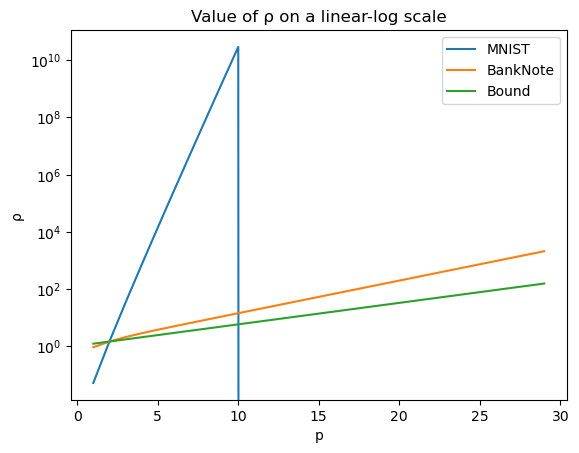

In [68]:

# Plot the values of ρ on a linear-log scale
for matelm in rho_values:
    #print(rho[0])
    plt.plot(p_values, rho_values[matelm][1], label=matelm)
    
plt.plot(p_values, [np.sqrt(2)**(p/2) for p in p_values], label='Bound')

plt.xlabel('p')
plt.ylabel('ρ')
plt.xscale('linear')
plt.legend()
plt.yscale('log')
plt.title('Value of ρ on a linear-log scale')
plt.show()

In [69]:
import numpy as np



# Example usage
A = np.array([[1, 2], [3, 4]])
p = 2
rho = compute_rho(A, p)
print("ρ =", rho)


ρ = 1.4173809615704656
